## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing all the necessary prerequisites


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [ ]:
from google.colab import drive                                                  # for mounting the dataset   
import numpy as np                                                              # for processing single-dimensional data centric operations
import pandas as pd                                                             # for processing multi-dimensional data centric operations
import matplotlib.pyplot as plt                                                 # for plotting/data visualization
import matplotlib.style                                                         # for customizing sheet color
import matplotlib.ticker as mtick                                               # for setting a tick for every integer value 
import seaborn as sns                                                           # for a more "graphical approach" towards plotting the data
import missingno as msno                                                        # for plotting null values 
import folium                                                                   # for visualizing the data in geospatial format   
from folium.plugins import HeatMap                                              # for plotting the data in the form of heat visuals
import plotly.express as px                                                     # for visualizing variety of data in different formats
import warnings                                                                 # for ignoring any warning interuptions that can disrupt the flow of code  
import random                                                                   # for randomly picking background style
import sort_dataframeby_monthorweek as sd                                       # for sorting dataframe by month

# Reading the Dataset

In [ ]:
drive.mount('/content/drive')
df_path = '/content/drive/My Drive/Colab Notebooks/Module 1/Capstone Project - (Hotel Booking Analysis - Sayesh Ankaram)/'
data = pd.read_csv(df_path + 'Hotel Bookings Dataset.csv', index_col=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Customizing the Warnings and Data Visualization for effective computing


In [ ]:
# altering the flow of code by suppressing graph-plot warnings and selecting random background style for the graphs
warnings.filterwarnings(action='ignore')
style_types = plt.style.available
for i in random.sample(style_types, len(style_types)):
  plt.style.use(i)
%matplotlib inline

# Getting an overview / Exploring the dataset 

In [ ]:
# getting total number of rows and columns present in the dataset
data.shape

(119390, 32)

In [ ]:
# surveying the dataset
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# getting an overall quantitative report of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Creating an instance of the original dataset

In [ ]:
# finally, creating an instance of the dataset in order to keep the original dataset safe and secure
df = data.copy()

# Data Processing

**1. Handling Null values.**

In [ ]:
# checking Null values
df.isna().sum().sort_values(ascending=False)[:7]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
dtype: int64

In [ ]:
# replacing Null values of 'country' with the most frequently occured value using mode
df['country'].fillna(data.country.mode().to_string(), inplace=True)

In [ ]:
# checking Null values in the updated dataset and creating a dataframe from all these Null values
null_df = pd.DataFrame({'Null values': df.isna().sum().sort_values(ascending=False)[:7], 'Null value Percentage': ((df.isna().sum().sort_values(ascending=False)[:7]) / (df.shape[0]) * 100)}) 
null_df 

,Null values,Null value Percentage
company,112593,94.306893
agent,16340,13.686238
children,4,0.003350
hotel,0,0.000000
previous_cancellations,0,0.000000
reservation_status,0,0.000000
total_of_special_requests,0,0.000000


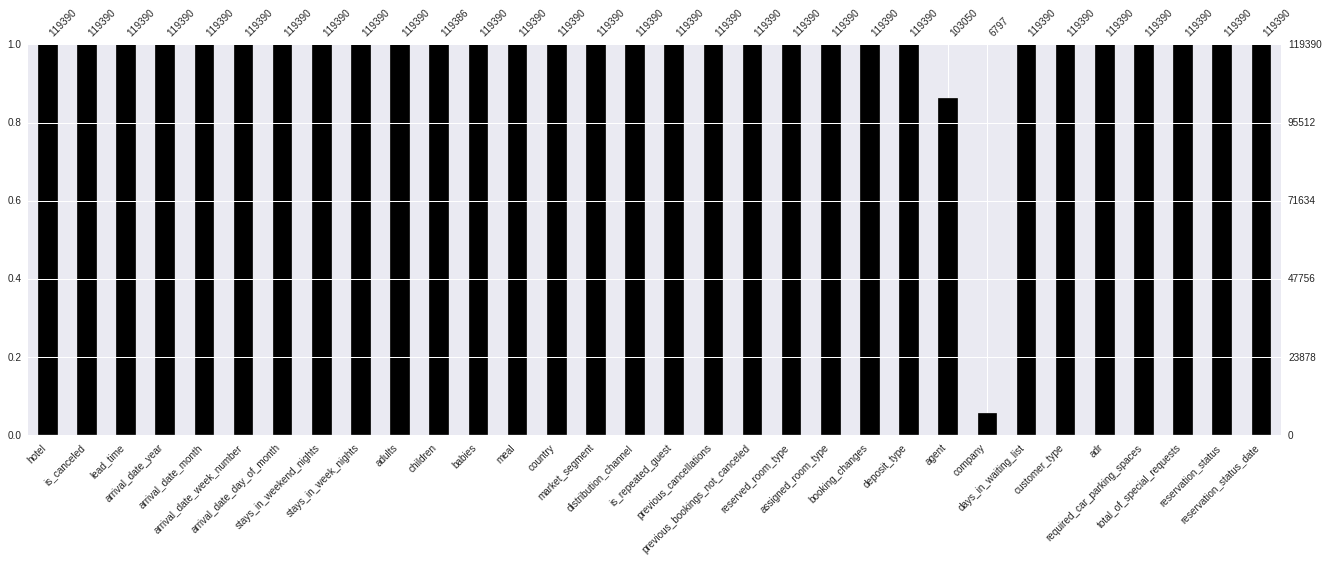

In [ ]:
# plotting Null values using missingno.bar 
msno.bar(df, figsize=(20, 7), fontsize=10, color='black')
plt.ylabel('Data completeness')
plt.show()

**2. Dropping unwanted rows.**

In [20]:
# filling Null values of Discrete variable 'children' with 0
df['children'].fillna(0, inplace=True)

In [21]:
# obtaining the data of unwanted rows where Discrete variables like 'adults', 'children' and 'babies' are 0
df[(df['adults'] + df['children'] + df['babies']) == 0].shape

(180, 32)

In [22]:
# dropping the 180 rows of unwanted Discrete variables 
df.drop(df[(df['adults'] + df['children'] + df['babies']) == 0].index, inplace=True)  

**3. Changing the datatypes.**

In [23]:
# obtaining the dtype of all the columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [24]:
# converting the Null values of Discrete variables 'children', 'agent' and 'company' to 0
df[['children', 'agent', 'company']].fillna(0, inplace=True) 

In [25]:
# converting the dtypes of columns such as 'children', 'agent' and 'company' because they're supposed to be in int64 but they're in float64 instead
df[['children', 'agent', 'company']] = df[['children', 'agent', 'company']].astype('Int64') 

**4. Dropping unwanted columns.**

In [26]:
df.drop(columns=['agent', 'company'], inplace=True)

**5. Creating Categorical Dataframe.**

In [27]:
# creating a categorical df by adding columns whose dtype='str'
cat_col = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_col]
cat_df.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
arrival_date_month,July,July,July,July,July
meal,BB,BB,BB,BB,BB
country,PRT,PRT,GBR,GBR,GBR
market_segment,Direct,Direct,Direct,Corporate,Online TA
distribution_channel,Direct,Direct,Direct,Corporate,TA/TO
reserved_room_type,C,C,A,A,A
assigned_room_type,C,C,C,A,A
deposit_type,No Deposit,No Deposit,No Deposit,No Deposit,No Deposit
customer_type,Transient,Transient,Transient,Transient,Transient


**6. Performing Feature Engineering in the Categorical dataframe.**


*   **Bifurcating 'reservation_status_date' column into year, month & date**

In [28]:
# dividing 'reservation_status_date' column into year, month & date
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df[['year', 'month', 'day']].reset_index().head()
cat_df.drop(columns=['year', 'month', 'day'], axis=1, inplace=True)


*   **Dropping the unwanted column 'reservation_status_date' & 'arrival_date_month'.**

In [29]:
# dropping the two unwanted columns because the day, month, year has been reformatted so there's no need of 'reservation_status_date' & 'arrival_date_month'
cat_df.drop(columns=['reservation_status_date', 'arrival_date_month'], axis=1, inplace=True)

*   **Obtaining Unique values of each Categorical Column.**

In [30]:
# iterating through each categorical column and getting unique values 
for col in cat_df.columns:
  print(f'{col} Unique Values: \n {df[col].unique()} \n')

hotel Unique Values: 
 ['Resort Hotel' 'City Hotel'] 

meal Unique Values: 
 ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

country Unique Values: 
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' '0    PRT' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 

*   **Obtaining Unique value Count of each Categorical Column.**

In [31]:
# iterating through each categorical column and getting unique value Counts
for col in cat_df.columns:
  print(f'{col} Unique Val Count: \n {df[col].value_counts()} \n')

hotel Unique Val Count: 
 City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64 

meal Unique Val Count: 
 BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64 

country Unique Val Count: 
 PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64 

market_segment Unique Val Count: 
 Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64 

distribution_channel Unique Val Count: 
 TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64 

reserved_room_type Unique Val Count: 
 A    85873
D    19179
E     6519
F     2894
G     2092
B     1115
C

*   **Obtaining deep insights of Categorical Data.**

In [32]:
# iterating through each categorical column and getting basic observations in terms of percentages
for col in cat_df.columns:
  print(f'{col} Unique Value Count: \n {df[col].value_counts(normalize=True)} \n')

hotel Unique Value Count: 
 City Hotel      0.664063
Resort Hotel    0.335937
Name: hotel, dtype: float64 

meal Unique Value Count: 
 BB           0.773727
HB           0.121282
SC           0.088491
Undefined    0.009806
FB           0.006694
Name: meal, dtype: float64 

country Unique Value Count: 
 PRT    0.406702
GBR    0.101669
FRA    0.087249
ESP    0.071806
DEU    0.061111
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 178, dtype: float64 

market_segment Unique Value Count: 
 Online TA        0.473182
Offline TA/TO    0.202852
Groups           0.166018
Direct           0.105545
Corporate        0.044308
Complementary    0.006107
Aviation         0.001971
Undefined        0.000017
Name: market_segment, dtype: float64 

distribution_channel Unique Value Count: 
 TA/TO        0.819982
Direct       0.122565
Corporate    0.055792
GDS          0.001619
Undefined    0.000042
Name: distribution_channel, dtype: flo

# Exploratory Data Analysis (EDA)

# **Question 1:** Which Country has the most number of Visitors? 

In [33]:
# taking the 0 cancellations from 'is_canceled' column for obtaining countries with most no. of guests and creating a data frame with it
country_with_max_guests = df[df['is_canceled'] == 0]['country'].value_counts().sort_values(ascending=False).reset_index()
country_with_max_guests.columns = ['Country', 'Guests']
country_with_max_guests

,Country,Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,SMR,1
162,BWA,1
163,MRT,1
164,MAC,1


In [34]:
# plotting the countries with most number of visitors using plotly.chloropeth
map = folium.Map()
max_guest_country_map = px.choropleth(country_with_max_guests, title='Countries with most number of visitors', locations=country_with_max_guests['Country'], color=country_with_max_guests['Guests'], hover_name=country_with_max_guests['Country'], labels={'Guests': 'Guest Count'})
max_guest_country_map.show()  

# **Conclusion:** Based on the above data we can conclude that, Countries with the most number of Guests are Portugal (Guest Count: 20977) followed by Great Britain (Guest Count: 9668) and France (Guest Count: 8468) and so on.

# **Question 2:** Which Country has the least number of Visitors? 

In [35]:
# taking the 0 cancellations from 'is_canceled' column for obtaining countries with least no. of guests and creating a data frame with it
country_with_min_guests = df[df['is_canceled'] == 0]['country'].value_counts().sort_values(ascending=True).reset_index()
country_with_min_guests.columns = ['Country', 'Guests']
country_with_min_guests

,Country,Guests
0,FRO,1
1,MAC,1
2,MRT,1
3,BWA,1
4,SMR,1
...,...,...
161,DEU,6067
162,ESP,6383
163,FRA,8468
164,GBR,9668


In [36]:
# plotting countries with least number of visitors using plotly.scatter_geo 
map = px.scatter_geo(country_with_min_guests, title='Countries with the least number of visitors', locations=country_with_min_guests['Country'], color=country_with_min_guests['Guests'], size=country_with_min_guests['Guests'], labels={'Guests':'Guest Count'})
map.show()

# **Conclusion:** Based on the above data we can conclude that, there are about 30 Countries with Guest Count: 1, 10 Countries with Guest Count: 2, 7 Countries with Guest Count: 3 and so on.

# **Question 3:** What is the Percentage of Bookings that were both, confirmed and cancelled? 

In [37]:
# creating a function that takes values of column 'is_canceled' and returns unique values and the percentage of the count of those unique values 
def get_count(series):
  val_count = series.value_counts()
  unq = val_count.index
  perc = (val_count/val_count.sum()) * 100
  return unq.values, perc.values

x,y = get_count(df['is_canceled'])  

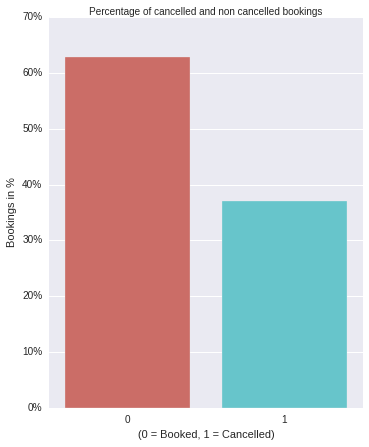

(<matplotlib.axes._subplots.AxesSubplot at 0x7f09e70054d0>, None)

In [38]:
# plotting the percentage of booking using a pyplot.barplot
def plot_count(x_ax, y_ax, title, xlabel, ylabel, figsize=(5,7)):
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_title(title, pad='2.0', fontsize=10)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  plot = sns.barplot(x, y, ax = ax, palette='hls')
  display = plt.show()
  return plot, display

plot_count(x_ax=x, y_ax=y, title='Percentage of cancelled and non cancelled bookings', xlabel='(0 = Booked, 1 = Cancelled)', ylabel='Bookings in %')

# **Conclusion:** Based on the above data we can conclude that, there are about 63% of non-cancelled bookings and 37% of cancelled bookings.  

# **Question 4:** What is the Hotel price per stay over a year?



In [39]:
# categorizing the nominal variable 'hotel' into two types based on their categorical values and bookings
resort_df = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city_df = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [40]:
# grouping resort hotel data and city hotel data with 'arrival_date_month' and 'adr'(average daily rate)
r_hotel_data = resort_df.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending=False).reset_index()
c_hotel_data = city_df.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending=False).reset_index() 

In [41]:
r_hotel_data

,arrival_date_month,adr
0,August,181.205892
1,July,150.122528
2,June,107.974850
3,September,96.416860
4,May,76.657558
5,April,75.867816
6,December,68.410104
7,October,61.775449
8,March,57.056838
9,February,54.147478


In [42]:
c_hotel_data

,arrival_date_month,adr
0,May,120.669827
1,August,118.674598
2,June,117.874360
3,July,115.818019
4,September,112.776582
5,April,111.962267
6,October,102.004672
7,March,90.658533
8,December,88.401855
9,November,86.946592


In [43]:
# merging the continous variable 'adr' of both the hotel data with 'arrival_date_month'
final_hotel_df = pd.merge(c_hotel_data, r_hotel_data, on='arrival_date_month')
final_hotel_df.rename(columns={'arrival_date_month':'Month', 'adr_x':'City Hotel', 'adr_y':'Resort Hotel'}, inplace=True)
final_hotel_df

,Month,City Hotel,Resort Hotel
0,May,120.669827,76.657558
1,August,118.674598,181.205892
2,June,117.874360,107.974850
3,July,115.818019,150.122528
4,September,112.776582,96.416860
5,April,111.962267,75.867816
6,October,102.004672,61.775449
7,March,90.658533,57.056838
8,December,88.401855,68.410104
9,November,86.946592,48.706289


In [44]:
# sorting the 'Month' variable in a sequential order 
def sort_month(df, col_name):
  return sd.Sort_Dataframeby_Month(df, col_name)

final_rates = sort_month(final_hotel_df, 'Month')
final_rates

,Month,City Hotel,Resort Hotel
0,January,82.330983,48.761125
1,February,86.520062,54.147478
2,March,90.658533,57.056838
3,April,111.962267,75.867816
4,May,120.669827,76.657558
5,June,117.874360,107.974850
6,July,115.818019,150.122528
7,August,118.674598,181.205892
8,September,112.776582,96.416860
9,October,102.004672,61.775449


In [74]:
# plotting the rate of hotels per night over a year using plotly.linechart
px.line(final_rates, title = 'Hotel Rates per Stay over a Year', x = 'Month', y = ['City Hotel', 'Resort Hotel'], hover_name = 'Month', template = 'plotly_white' )

# **Conclusion:** Based on the above data we can conclude that, the Hotel rates for Resort hotel had an exponential growth in Summer season (May-August) but in Autumn season (September-November) the hotel rates took a massive dip. Similarly, the Hotel rates for City hotel had a decent growth in Spring season (March-May) but in Autumn season (September-November) the hotel rates slightly went down.    






# **Question 5:** What are the Hotel rates paid by customers per night based on different room types?

In [78]:
# obtaining all the booked hotels
booked_df = df[(df['is_canceled'] == 0)]

In [77]:
# plotting the hotel rates paid by customers by considring data with respect to 'adr'(average daily rates) and 'reserved_room_type' because each room type has different rates using plotly.box
px.box(booked_df, template = 'seaborn', x = 'reserved_room_type', y = 'adr', width = 1000, height = 500, color='hotel', title='Hotel rates paid by customers per night based on different room types') 

# **Conclusion:** Based on the above data we can conclude that, the highest rates for a hotel room in both City hotel and Resort hotel are of Type: A, apart from this the rates of Resort hotels and City hotels per night paid by the customers are almost arguable because these rates are not fixed and hence they vary with respect to the room types and various luxeries that comes with it. 
# Based on above data, Below is a price range for various room types in both  Resort hotels and City hotels:



# 1. Resort Hotels

*   **Type A:**  Max - 508, Min - 0
*   **Type B:**  Max - 134, Min - 70
*   **Type C:**  Max - 137, Min - 0  
*   **Type D:**  Max - 350.75 , Min - 0  
*   **Type E:**  Max - 349.67, Min - 0
*   **Type F:**  Max - 368.1, Min - 0
*   **Type G:**  Max - 426.25, Min - 0
*   **Type H:**  Max - 402, Min - 0
*   **Type L:**  Max - 200, Min - 82



# 2. City Hotels

*   **Type A:**  Max - 510, Min - 0
*   **Type B:**  Max - 263, Min - 70
*   **Type C:**  Max - 130, Min - 0  
*   **Type D:**  Max - 375.5 , Min - 0  
*   **Type E:**  Max - 275, Min - 0
*   **Type F:**  Max - 349.63, Min - 0
*   **Type G:**  Max - 372.33, Min - 0
*   **Type H:**  NA
*   **Type L:**  NA
















# **Question 6:** How long do people stay in the hotel rooms?

In [48]:
# obtaining all the stayed hotels
stay_period = df[(df['is_canceled']) == 0]

In [49]:
# summing both the columns 'stays_in_week_nights' and 'stays_in_weekend_nights' to get total nights
stay_period['total nights'] = stay_period['stays_in_week_nights'] + stay_period['stays_in_weekend_nights']   

In [50]:
# grouping the total no. of nights and hotel type with the aggregate of count to get the number of stays
stay_df = stay_period.groupby(['total nights','hotel']).agg('count').reset_index()
stay_df = stay_df.loc[:, ['total nights', 'hotel', 'is_canceled']].sort_values(by='is_canceled', ascending=False)
stay_df.rename(columns={'total nights':'Total Nights', 'hotel':'Hotel', 'is_canceled':'Number of Stays'}, inplace=True)
stay_df

,Total Nights,Hotel,Number of Stays
6,3,City Hotel,11889
4,2,City Hotel,10983
2,1,City Hotel,9155
8,4,City Hotel,7694
3,1,Resort Hotel,6579
...,...,...,...
45,23,City Hotel,1
41,21,City Hotel,1
40,20,City Hotel,1
36,18,City Hotel,1


In [51]:
# plotting the total number of stays using plotly.barplot
map = px.bar(stay_df, x='Total Nights', y='Number of Stays', color=stay_df['Hotel'], hover_name=stay_df['Number of Stays'], labels={'Number of Stays':'Total Stays'}, barmode='group', title='Total number of Stays')
map.show()

# **Conclusion:** Based on the above data we can conclude that, Maximum number of stays are from City Hotels: 3 nights - (Stay Count: 11895), 2 nights - (Stay Count: 10992), 1 night - (Stay Count: 9169), followed by Resort hotels: 1 night - (Stay Count: 6580). It is noticeable that the type of hotels preferred by people for one day to three days stay are mostly City Hotels.   

# **Question 7:** Which is the most booked type of accomodation?

In [52]:
# obtaining all the active accomodations
accom_df = df[(df['is_canceled']) == 0]

In [53]:
# creating 3 different variables for 3 different types of accomodations 
single = accom_df[(accom_df['adults'] == 1) & (accom_df['children'] == 0) & (accom_df['babies'] == 0)]
couple = accom_df[(accom_df['adults'] == 2) & (accom_df['children'] == 0) & (accom_df['babies'] == 0)]
family = accom_df[(accom_df['adults'] >= 2) & (accom_df['children'] >= 0) & (accom_df['babies'] >= 0)]

In [54]:
# creating a list of acommodation types, their counts and their count percentages where 'accom_types' will be x and 'accom_percentile' will be y
accom_types = ['Single', 'Couple', 'Family']
accom_counts = [single.shape[0], couple.shape[0], family.shape[0]]
accom_percentile = [round((i / accom_df.shape[0]) * 100,2) for i in accom_counts]

In [55]:
# creating new df 'accom_final' and storing 'accom_types', 'accom_percentile' in it
accom_zipped = zip(accom_types, accom_percentile)
accom_final = pd.DataFrame(accom_zipped, columns=['Accomodation Type', 'Accomodation in (%)'])
accom_final.sort_values(by='Accomodation in (%)', ascending=False)  

,Accomodation Type,Accomodation in (%)
2,Family,78.01
1,Couple,65.51
0,Single,21.36


In [56]:
# plotting the most booked type of accomodation using plotly.barplot
map = px.bar(accom_final, template='plotly_dark', title='The most booked accomodation type', x='Accomodation Type', y='Accomodation in (%)', width=700, color='Accomodation in (%)', labels={'Accomodation Type':'Accomodation Types', 'Accomodation in (%)':'Accomodation in (%)'}) 
map.show()

# **Conclusion:** Based on the above data we can conclude that, Out of the three Accomodations, most preferred Accomodation type by customers is Family type (77.85 %), followed by Couple type (65.37 %) and lastly Single type (21.32 %).

# **Question 8:** Which mode of booking is most frequently used by customers?

In [57]:
# obtaining all the booking modes 
booking_mode_df = df[(df['is_canceled'] == 0)]

In [58]:
# creating 7 different variables for 7 different types of Booking modes 
Online_TA = booking_mode_df[(booking_mode_df['market_segment'] == 'Online TA')]
Offline_TO = booking_mode_df[(booking_mode_df['market_segment'] == 'Offline TA/TO')]
Direct = booking_mode_df[(booking_mode_df['market_segment'] == 'Direct')]
Groups = booking_mode_df[(booking_mode_df['market_segment'] == 'Groups')]
Corporate = booking_mode_df[(booking_mode_df['market_segment'] == 'Corporate')]
Complementary = booking_mode_df[(booking_mode_df['market_segment'] == 'Complementary')]
Aviation = booking_mode_df[(booking_mode_df['market_segment'] == 'Aviation')]

In [59]:
# creating a list of Booking modes, their counts and their count percentages where 'b_mode_percentile' will be x and 'b_mode_types' will be y
b_mode_types = ['Online', 'Offline', 'Direct', 'Groups', 'Corporate', 'Complementary', 'Aviation']
b_mode_counts = [Online_TA.shape[0], Offline_TO.shape[0], Direct.shape[0], Groups.shape[0], Corporate.shape[0], Complementary.shape[0], Aviation.shape[0]]
b_mode_percentile = [round((i / booking_mode_df.shape[0]) * 100, 2) for i in b_mode_counts]

In [60]:
# creating new df 'b_mode_final' and storing 'b_mode_types', 'b_mode_percentile' in it
b_mode_zipped = zip(b_mode_types, b_mode_percentile)
b_mode_final = pd.DataFrame(b_mode_zipped, columns=['Booking Modes', 'Booking Mode (%)'])
b_mode_final.sort_values(by='Booking Mode (%)', ascending=False)

,Booking Modes,Booking Mode (%)
0,Online,47.56
1,Offline,21.17
2,Direct,14.20
3,Groups,10.26
4,Corporate,5.72
5,Complementary,0.85
6,Aviation,0.24


In [82]:
# plotting the most frequently used booking mode using plotly.funnel
map = px.funnel(b_mode_final, title='Mode of Booking most frequently used', x='Booking Modes', y='Booking Mode (%)', color='Booking Modes', hover_name='Booking Mode (%)', template='plotly_dark') 
map.show()

# **Conclusion:** Based on the above data we can conclude that, The most frequently used mode for Booking is Online mode (47.55 %), followed by Offline Mode (21.16 %).

# **Question 9:** Which Meal type is most preferred & booked by customers? 

In [62]:
# obtaining all the active Meal types
meal_type_df = df[(df['is_canceled'] == 0)]

In [63]:
# creating 5 different variables for 5 different types of Booking modes 
BB = meal_type_df[(meal_type_df['meal'] == 'BB')]
HB = meal_type_df[(meal_type_df['meal'] == 'HB')]
SC = meal_type_df[(meal_type_df['meal'] == 'SC')]
Undefined = meal_type_df[(meal_type_df['meal'] == 'Undefined')]
FB = meal_type_df[(meal_type_df['meal'] == 'FB')]

In [64]:
# creating a list of meal types, their counts and their count percentages where 'meal_types' will be x and 'meal_percentile' will be y
meal_types = ['Bfast & Bed', 'Bfast & Dinn', 'Bfast lun & dinn', 'Self', 'Undefined']
meal_counts = [BB.shape[0], HB.shape[0], SC.shape[0], Undefined.shape[0], FB.shape[0]]
meal_percentile = [round((i / meal_type_df.shape[0]) * 100,2) for i in meal_counts]

In [65]:
# creating new df 'meal_type_final' and storing 'meal_types', 'meal_percentile' in it
meal_type_zipped = zip(meal_types, meal_percentile)
meal_type_final = pd.DataFrame(meal_type_zipped, columns=['Meal Types', 'Meal Order in (%)'])
meal_type_final.sort_values(by='Meal Order in (%)', ascending=False)

,Meal Types,Meal Order in (%)
0,Bfast & Bed,76.96
1,Bfast & Dinn,12.63
2,Bfast lun & dinn,8.80
3,Self,1.18
4,Undefined,0.43


In [66]:
# plotting the most preferred and booked meal type by customers using plotly.pie
map = px.pie(meal_type_final, title='Most preferred & booked Meal type', names='Meal Types', values='Meal Order in (%)', color_discrete_sequence=px.colors.sequential.RdBu, hole = 0.19, hover_name='Meal Order in (%)', template='plotly') 
map.show()

# **Conclusion:** Based on the above data we can conclude that, The most preferred & booked Meal type is Breakfast & Bed (Meal Type Count: 76.9 %), followed by Breakfast & Dinner (Meal Type Count: 12.6 %).  

# **Question 10:** What is the Reservation status? 

In [67]:
# obtaining all the active Reservations
reserv_stat_df = df[(df['reservation_status'] == 'Check-Out') + (df['reservation_status'] == 'Canceled') + (df['reservation_status'] == 'No-Show')]

In [68]:
# creating 3 different variables for 3 different types of reservation status 
Checkout = reserv_stat_df[(reserv_stat_df['reservation_status'] == 'Check-Out')]
Canceled = reserv_stat_df[(reserv_stat_df['reservation_status'] == 'Canceled')]
Noshow = reserv_stat_df[(reserv_stat_df['reservation_status'] == 'No-Show')]

In [69]:
# creating a list of reservation types, their counts and their count percentages where 'rsrv_types' will be x and 'reserv_percentile' will be y
rsrv_types = ['Check-Out', 'Canceled', 'No-Show']
rsrv_counts = [Checkout.shape[0], Canceled.shape[0], Noshow.shape[0]]
rsrv_percentile = [round((i / reserv_stat_df.shape[0]) * 100,2) for i in rsrv_counts]

In [70]:
# creating new df 'rsrv_type_final' and storing 'rsrv_types', 'rsrv_percentile' in it
rsrv_type_zipped = zip(rsrv_types, rsrv_percentile)
rsrv_type_final = pd.DataFrame(rsrv_type_zipped, columns=['Reservation Status', 'Reservation Status in (%)'])
rsrv_type_final.sort_values(by='Reservation Status in (%)', ascending=False)

,Reservation Status,Reservation Status in (%)
0,Check-Out,62.92
1,Canceled,36.06
2,No-Show,1.01


In [79]:
# plotting the reservation status using plotly.histogram
map = px.histogram(rsrv_type_final, title='Reservation Status', x='Reservation Status', y='Reservation Status in (%)', barmode='relative', color='Reservation Status', color_discrete_sequence=px.colors.sequential.Rainbow_r, template='plotly_dark') 
map.show()

# **Conclusion:** Based on the above data we can conclude that, 62.96 % of customers Checked-Out whereas 36.03 % of customers Canceled the Booking and 1.01 % of customers didn't show up. 

# **Overall Summary:**

* **There are about 63% of confirmed bookings & 37% of cancelled bookings.**
* **For 1-3 days, majority of people prefer City Hotels and for 4-7 days, majority of people prefer Resort Hotels.**
* **The Highest Rates for a hotel room in both City & Resort hotels is for Room Type A.**
* **Hotel rates for Resort hotels are at peak in Summer season (May-August) but in Autumn season (September-November) the rates become cheaper.**
* **Hotel rates for City hotels have a decent growth in Spring season (March-May) but in Autumn season (September-November) the hotel rates slightly fell down.**
* **47.56 % of customers prefer Online mode for hotel booking & 21.17 % of customers prefer Offline mode.**
* **76.96 % of customers prefer Breakfast & Bed & 12.6 % of customers prefer Breakfast & Dinner as the Meal Type while Booking hotels.**
* **77.85 % of customers prefer Family Type of Accomodation & 65.51 % of customers prefer Couple Type of Accomodation.**
* **62.92 % of customers Checked-Out, 36.06 % of customers Cancelled the Booking & 1.10 % of customers didn’t show up.**
* **Countries with the most number of Guests are Portugal (Guest Count: 20977) followed by Great Britain (Guest Count: 9668) and France (Guest Count: 8468).**
* **87.6 % of customers prefer No – deposit while booking hotel rooms.**
* **66.4 % of customers prefer City hotels & 33.5 % of customers prefer Resort hotels.**


